In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import mlUtils as ml

In [2]:
df = pd.read_csv("dataTestwithout0.csv")

In [3]:
df.head()

,make,model,derivative,year,price,fuelType,mileage,sellerType,transmission,engineSize,color,manufacturerColor,condition,owners,taxBandCode
0,Mercedes-Benz,E Class,E 300De AMG Line Plus *MULTISPOKE ALLOYS*NIGHT...,2026,89900,Diesel Plug-in Hybrid,0,ContactTrade,Automatic,2.0,Black,Black,new,NaN,NaN
1,Mercedes-Benz,E Class,E 300De AMG Line Plus *MULTISPOKE ALLOYS*,2026,89500,Diesel Plug-in Hybrid,0,ContactTrade,Automatic,2.0,Black,Black,new,NaN,NaN
2,Mercedes-Benz,E Class,E 300De AMG Line *MULTISPOKE ALLOYS*NIGHT PACK...,2026,89500,Diesel Plug-in Hybrid,0,ContactTrade,Automatic,2.0,Silver,Silver,new,NaN,NaN
3,Mercedes-Benz,E Class,E 300De AMG Line Plus *Hyperscreen* 360 Camera...,2026,89495,Diesel Plug-in Hybrid,0,ContactTrade,Automatic,2.0,Black,Black,new,NaN,NaN
4,Mercedes-Benz,E Class,E 300 e AMG EDITION PLUS,2026,89367,Petrol Plug-in Hybrid,14,ContactTrade,Automatic,2.0,Grey,Graphite Grey Metallic,new,NaN,NaN


In [4]:
# inputs
features = df[["make", "model", "year", "mileage", "fuelType", "engineSize"]]
x = df["mileage"]
# output/target
y = df["price"]

In [5]:
# Add +1 to avoid log(0)
x_log = np.log(x + 1)

# Standardize (important for gradient descent)
x_log_norm = (x_log - x_log.mean()) / x_log.std()

In [6]:
w_final, b_final, J_hist, p_hist = ml.train(x_log_norm ,y)

Iteration    0: Cost 2.20e+09  dj_dw:  1.941e+04, dj_db: -6.984e+04   w: -1.941e+03, b: 6.98370e+03
Iteration  100: Cost 7.61e+07  dj_dw:  5.333e-01, dj_db: -1.855e+00   w: -1.947e+04, b: 6.98353e+04
Iteration  200: Cost 7.61e+07  dj_dw:  1.466e-05, dj_db: -4.927e-05   w: -1.947e+04, b: 6.98370e+04
Iteration  300: Cost 7.61e+07  dj_dw:  4.006e-10, dj_db: -1.302e-09   w: -1.947e+04, b: 6.98370e+04
Iteration  400: Cost 7.61e+07  dj_dw:  1.634e-11, dj_db: -6.005e-11   w: -1.947e+04, b: 6.98370e+04
Iteration  500: Cost 7.61e+07  dj_dw:  1.634e-11, dj_db: -6.005e-11   w: -1.947e+04, b: 6.98370e+04
Iteration  600: Cost 7.61e+07  dj_dw:  1.634e-11, dj_db: -6.005e-11   w: -1.947e+04, b: 6.98370e+04
Iteration  700: Cost 7.61e+07  dj_dw:  1.634e-11, dj_db: -6.005e-11   w: -1.947e+04, b: 6.98370e+04
Iteration  800: Cost 7.61e+07  dj_dw:  1.634e-11, dj_db: -6.005e-11   w: -1.947e+04, b: 6.98370e+04
Iteration  900: Cost 7.61e+07  dj_dw:  1.634e-11, dj_db: -6.005e-11   w: -1.947e+04, b: 6.98370e+04


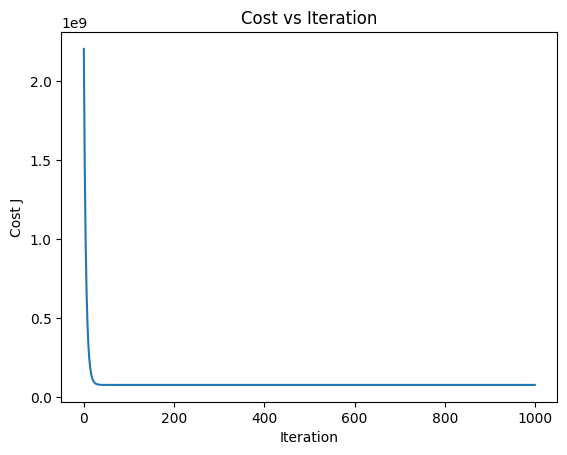

In [7]:
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.title("Cost vs Iteration")
plt.show()

-19468.705346525214 69836.98470948006


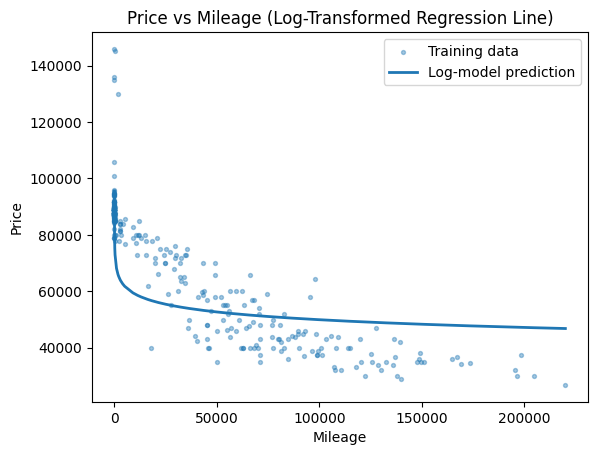

In [8]:
# Sort original mileage so the line draws correctly
x_log = np.log(x + 1)
x_log_mean = x_log.mean()
x_log_std = x_log.std()
x_sorted = np.sort(x)

# Apply SAME LOG + NORMALIZATION as training
x_sorted_log = np.log(x_sorted + 1)
x_sorted_norm = (x_sorted_log - x_log_mean) / x_log_std

print(w_final, b_final)
# Model predictions using learned w and b
y_pred_line = w_final * x_sorted_norm + b_final

# Plot actual training points
plt.scatter(x, y, alpha=0.4, label="Training data", s=8)

# Plot prediction line
plt.plot(x_sorted, y_pred_line, linewidth=2, label="Log-model prediction")

plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Price vs Mileage (Log-Transformed Regression Line)")
plt.legend()
plt.show()